# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(42)
%matplotlib notebook

In [2]:
# Load Data
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Checking Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
# Stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [5]:
data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<IPython.core.display.Javascript object>


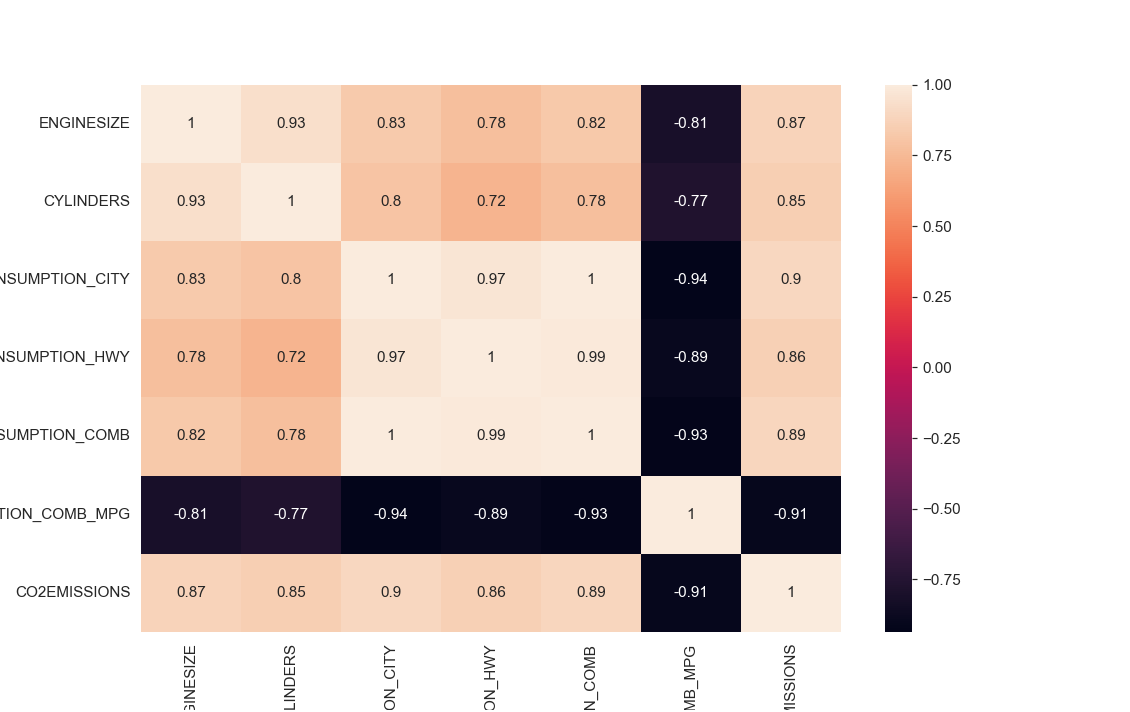

<AxesSubplot:>

In [6]:
# Corr heatmap
# Feature Selection
sns.set_style(style='darkgrid')
sns.heatmap(data.corr(), annot=True)

<IPython.core.display.Javascript object>


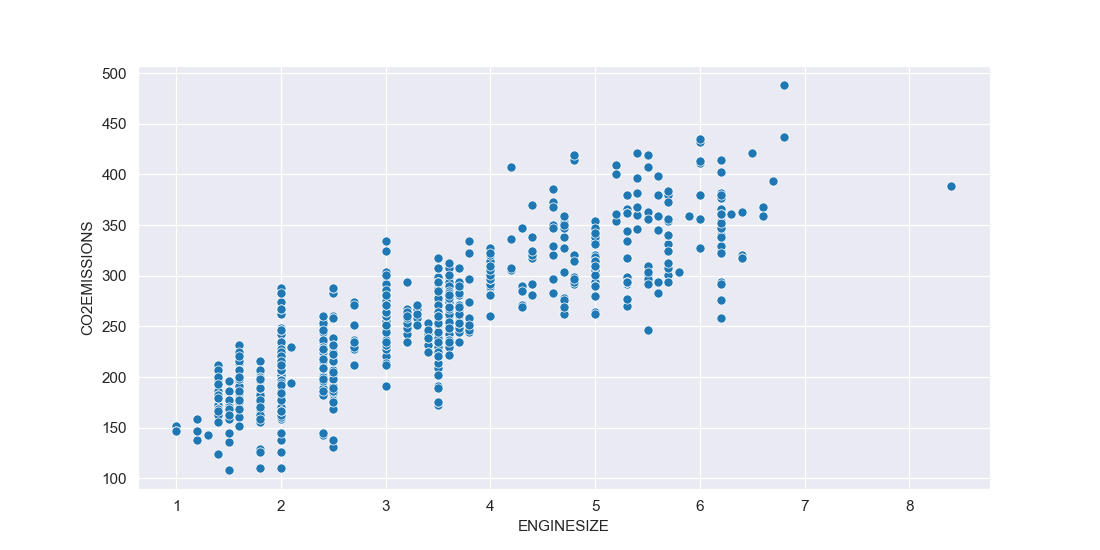

In [7]:
# EDA
plt.figure(figsize=(10,5))
sns.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data)
plt.show()

<IPython.core.display.Javascript object>


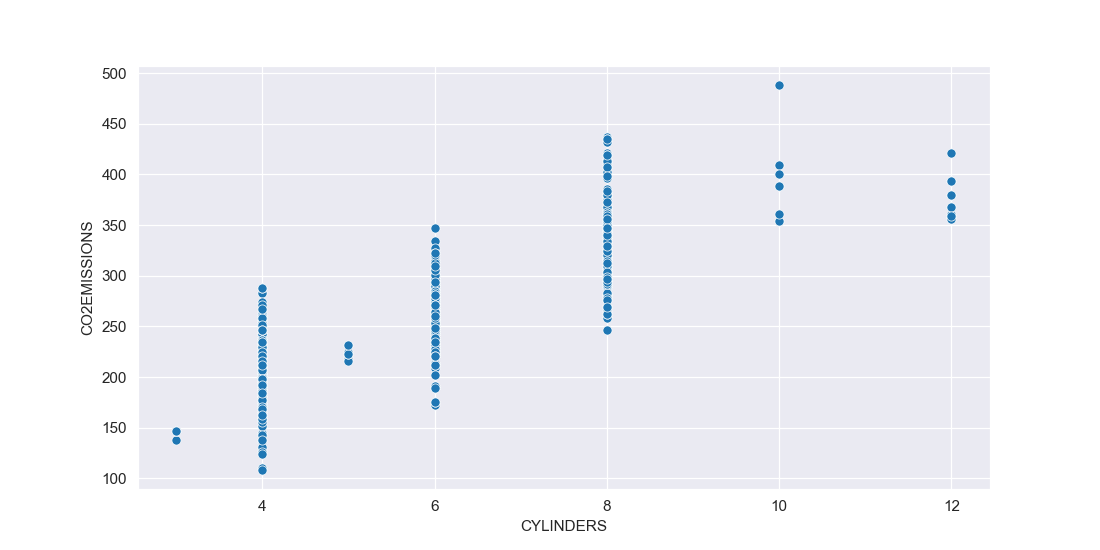

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='CYLINDERS', y='CO2EMISSIONS', data=data)
plt.show()

<IPython.core.display.Javascript object>


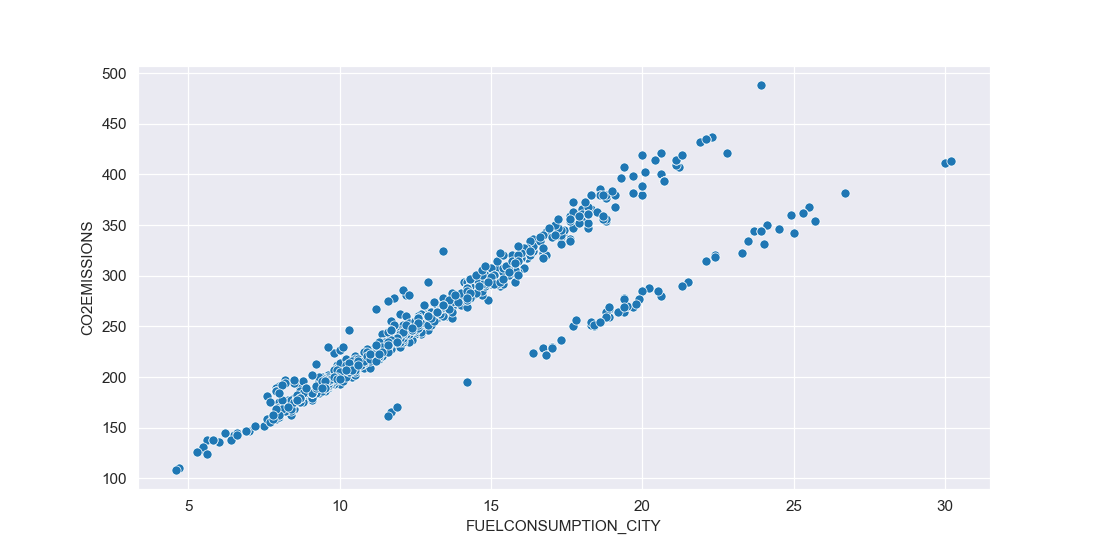

In [10]:

plt.figure(figsize=(10,5))
sns.scatterplot(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', data=data)
plt.show()

<IPython.core.display.Javascript object>


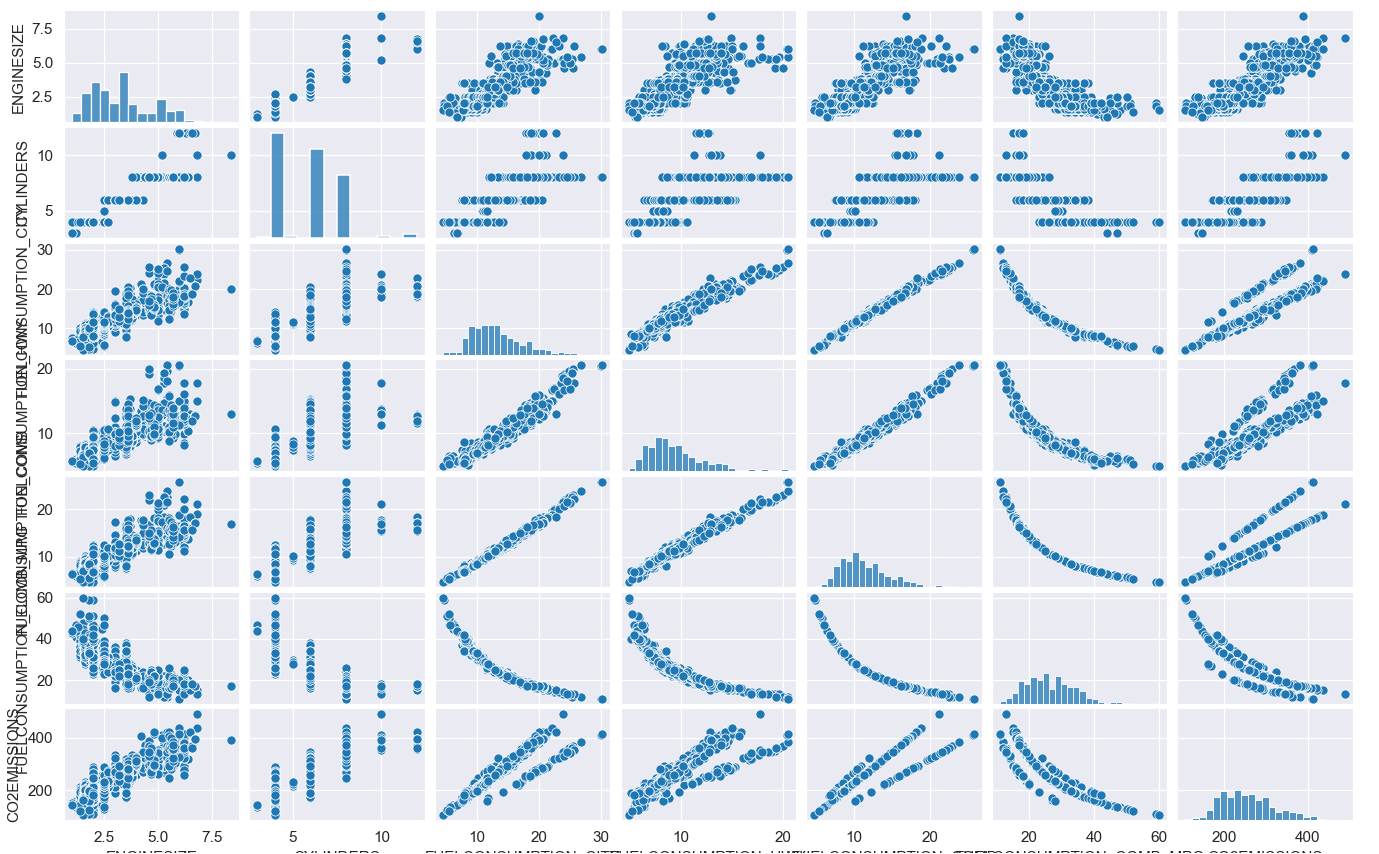

In [11]:
sns.pairplot(data)

In [12]:
# Spliting Data
x = data[['ENGINESIZE']]
y = data[['CO2EMISSIONS']]

In [13]:
x.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [14]:
y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [16]:
# SPliting Data in Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
ytrain.shape, xtrain.shape

In [ ]:
ytrain.head()

In [17]:
# Modeling
from sklearn.linear_model import LinearRegression
# Model Init
model = LinearRegression()

# Train
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
model.intercept_

array([126.28970217])

In [19]:
model.coef_

array([[38.99297872]])

In [20]:
# Test Prediction
ypred = model.predict(xtest)
xtest.values[0],ytest.values[0], ypred[0]

(array([4.7]), array([304], dtype=int64), array([309.55670218]))

In [21]:
ytest.values[0]- ypred[0]

array([-5.55670218])

In [22]:
# Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

MSE: 985.9381692274999
R2 Score : 76.15595731934373


In [ ]:
dummy_x = np.linspace(1,9, 400).reshape(-1,1)
sns.scatterplot(data=data, x='ENGINESIZE', y='CO2EMISSIONS')
plt.plot(dummy_x,model.predict(dummy_x), color='darkorange', linewidth=5)

In [ ]:
x = data[['CYLINDERS']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# Model Init
model = LinearRegression()

# Train
model.fit(xtrain, ytrain)
# Test Prediction
ypred = model.predict(xtest)
# Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

In [ ]:
dummy_x = np.linspace(3,13, 400).reshape(-1,1)
sns.scatterplot(data=data, x='CYLINDERS', y='CO2EMISSIONS')
plt.plot(dummy_x,model.predict(dummy_x), color='darkorange')

In [ ]:
x = data[['FUELCONSUMPTION_CITY']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# Model Init
model = LinearRegression()

# Train
model.fit(xtrain, ytrain)
# Test Prediction
ypred = model.predict(xtest)
# Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

In [ ]:
# Model Viz
dummy_x = np.linspace(4,32, 400).reshape(-1,1)
sns.scatterplot(data=data, x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS')
plt.plot(dummy_x,model.predict(dummy_x), color='darkorange')

In [ ]:
x = data[['FUELCONSUMPTION_HWY']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# Model Init
model = LinearRegression()

# Train
model.fit(xtrain, ytrain)
# Test Prediction
ypred = model.predict(xtest)
# Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

In [ ]:
x = data[['FUELCONSUMPTION_COMB']]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# Model Init
model = LinearRegression()

# Train
model.fit(xtrain, ytrain)
# Test Prediction
ypred = model.predict(xtest)
# Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

In [ ]:
# Multiple Linear Regression
features = data[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
target = data[['CO2EMISSIONS']]
xtrain, xtest, ytrain, ytest = train_test_split(features, target,
                                test_size=0.2, random_state=42)
# Modeling
model2 = LinearRegression()
model2.fit(xtrain, ytrain)
# Evaluation 
ypred = model2.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

In [25]:
# Multiple Linear Regression
features = data[['ENGINESIZE','FUELCONSUMPTION_CITY']]
target = data[['CO2EMISSIONS']]
xtrain, xtest, ytrain, ytest = train_test_split(features, target,
                                test_size=0.2, random_state=42)
# Modeling
model2 = LinearRegression()
model2.fit(xtrain, ytrain)
# Evaluation 
ypred = model2.predict(xtest)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print(f'MSE: {mse}')
print(f'R2 Score : {r2*100}')

MSE: 531.437022592893
R2 Score : 87.14766559984764


# Cross Validation

In [26]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=10,shuffle=True,random_state=42)
scores = []
for train_idx, test_idx in folds.split(features, target):
    # Fetching train data
    xtrain = features.values[train_idx]
    ytrain = target.values[train_idx]
    # Fetching test data
    xtest = features.values[test_idx]
    ytest = target.values[test_idx]

    # modeling
    kmodel = LinearRegression().fit(xtrain, ytrain)

    # Evaluation
    ypred = kmodel.predict(xtest)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    print(f'MSE: {mse}')
    print(f'R2 Score : {r2*100}')
    scores.append((mse, r2))

MSE: 532.4723451265525
R2 Score : 85.45075654944341
MSE: 528.7801456576755
R2 Score : 88.51219405408942
MSE: 512.2802154236145
R2 Score : 86.49690219753853
MSE: 658.2628733266782
R2 Score : 84.98218148416905
MSE: 651.2981354511791
R2 Score : 82.85602401035403
MSE: 437.4670296763727
R2 Score : 90.52593739176216
MSE: 718.934692863923
R2 Score : 82.984766158357
MSE: 485.4678597297004
R2 Score : 85.8447876779918
MSE: 677.2230988865234
R2 Score : 83.57582567717132
MSE: 511.61909296119
R2 Score : 84.39044308823198


In [27]:
scores = np.array(scores)
scores[:,0].mean(), scores[:,1].mean()

(571.3805489103408, 0.8556198182891087)

In [28]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(kmodel,features, target, cv=10)
cv

array([0.89819241, 0.83574189, 0.72386438, 0.83211429, 0.80532118,
       0.82335349, 0.87404569, 0.89424488, 0.91983033, 0.87877845])

In [29]:
cv.mean()

0.8485486974564493

# Model Visualization

In [30]:
features.describe()

,ENGINESIZE,FUELCONSUMPTION_CITY
count,1067.000000,1067.000000
mean,3.346298,13.296532
std,1.415895,4.101253
min,1.000000,4.600000
25%,2.000000,10.250000
50%,3.400000,12.600000
75%,4.300000,15.550000
max,8.400000,30.200000


In [31]:
final_model = LinearRegression()
final_model.fit(features, target)

LinearRegression()

In [32]:
final_model.coef_

array([[18.45983255,  8.57268455]])

In [33]:
dummy_e = np.linspace(1, 8, 300)
dummy_f = np.linspace(4, 30, 300)
dummy_feature =np.c_[dummy_e, dummy_f]
dummy_feature

array([[ 1.        ,  4.        ],
       [ 1.02341137,  4.08695652],
       [ 1.04682274,  4.17391304],
       [ 1.07023411,  4.26086957],
       [ 1.09364548,  4.34782609],
       [ 1.11705686,  4.43478261],
       [ 1.14046823,  4.52173913],
       [ 1.1638796 ,  4.60869565],
       [ 1.18729097,  4.69565217],
       [ 1.21070234,  4.7826087 ],
       [ 1.23411371,  4.86956522],
       [ 1.25752508,  4.95652174],
       [ 1.28093645,  5.04347826],
       [ 1.30434783,  5.13043478],
       [ 1.3277592 ,  5.2173913 ],
       [ 1.35117057,  5.30434783],
       [ 1.37458194,  5.39130435],
       [ 1.39799331,  5.47826087],
       [ 1.42140468,  5.56521739],
       [ 1.44481605,  5.65217391],
       [ 1.46822742,  5.73913043],
       [ 1.4916388 ,  5.82608696],
       [ 1.51505017,  5.91304348],
       [ 1.53846154,  6.        ],
       [ 1.56187291,  6.08695652],
       [ 1.58528428,  6.17391304],
       [ 1.60869565,  6.26086957],
       [ 1.63210702,  6.34782609],
       [ 1.65551839,

<IPython.core.display.Javascript object>


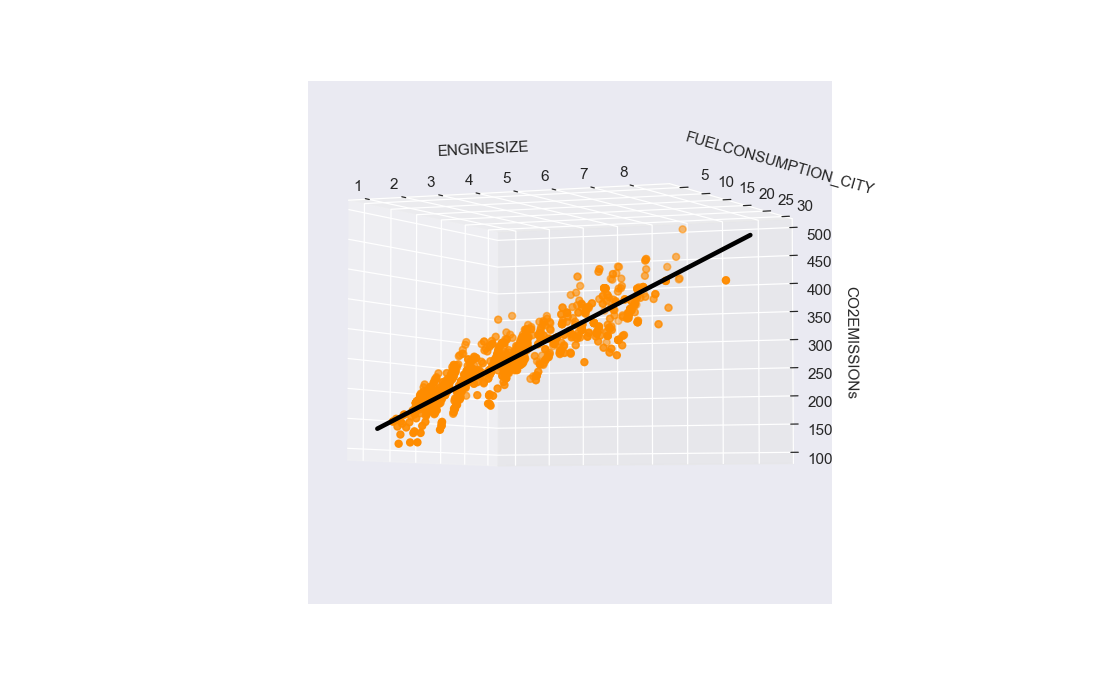

C:\Python3.9\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(
    features.values[:,0], features.values[:,1], target, color='darkorange'
)
axes.plot3D(
    dummy_e, dummy_f, final_model.predict(dummy_feature).ravel(), color='black', linewidth=3
)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_CITY')
axes.set_zlabel('CO2EMISSIONs')
plt.show()

In [165]:
final_model.predict(dummy_feature).ravel()

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([133.22017062, 134.4882012 , 135.75623178, 137.02426236,
       138.29229294, 139.56032352, 140.8283541 , 142.09638468,
       143.36441526, 144.63244584, 145.90047642, 147.168507  ,
       148.43653758, 149.70456816, 150.97259874, 152.24062932,
       153.5086599 , 154.77669048, 156.04472106, 157.31275164,
       158.58078222, 159.8488128 , 161.11684338, 162.38487395,
       163.65290453, 164.92093511, 166.18896569, 167.45699627,
       168.72502685, 169.99305743, 171.26108801, 172.52911859,
       173.79714917, 175.06517975, 176.33321033, 177.60124091,
       178.86927149, 180.13730207, 181.40533265, 182.67336323,
       183.94139381, 185.20942439, 186.47745497, 187.74548555,
       189.01351613, 190.28154671, 191.54957729, 192.81760787,
       194.08563845, 195.35366903, 196.62169961, 197.88973019,
       199.15776077, 200.42579135, 201.69382193, 202.96185251,
       204.22988309, 205.49791367, 206.76594425, 208.03397483,
       209.3020054 , 210.57003598, 211.83806656, 213.10